#### Travis Peck
#### 47937062

#### Graph Object to be used throughout the assignment:

In [157]:
class Graph:
    def __init__(self, Nodes):
        self.adj_list = {}
        self.nodes = []
        self.num_nodes = Nodes
        self.num_edges = 0
        
        for node in range(1,Nodes+1):
            self.nodes.append(node)
            self.adj_list[node] = []
            
    def add_edge(self, u, v):
        if v not in self.adj_list[u]:
            self.adj_list[u].append(v)
        if u not in self.adj_list[v]:
            self.adj_list[v].append(u)
            
    def print_adj_list(self):
            for node in self.nodes:
                print(node, "->", self.adj_list[node])
                
    def make_complete_graph(self):
        for i in self.adj_list:
            self.adj_list[i].extend([x for x in self.adj_list if x != i])   
        return self.adj_list
    #Time complexity: n * c * n = theta(n^2)

    def make_cycle_graph(self):
        for i in self.nodes:
            self.adj_list[i].append((i + 1) % self.num_nodes)
            self.adj_list[i].append((i - 1) % self.num_nodes)
        return self.adj_list
    #Time complexity: n * c1 + c2 = theta(n)
    
    def select_random_vertices(self):
        import random
        v1 = random.randint(1,self.num_nodes)
        v2 = random.randint(1,self.num_nodes)
        while v1==v2:
            v2 = random.randint(1,self.num_nodes)
        return v1,v2
    #time complexity: c1 + c2 * c3 + c4 = theta(c)
            
    def generate_random_edges(self, Edges):
        self.num_edges = Edges
        for i in range(1,Edges):
            v1,v2 = self.select_random_vertices()
            self.add_edge(v1, v2)
    #time complexty: c1 + n * c2 * c3 = theta(n)
            

In [258]:
#Output function, as required by the second page of the assignment
def file_of_integers(graph):
    weight = 1
    value = graph.num_nodes
    counter = []
    counter.append(graph.num_nodes)
    print(value, "- Number of Vertices")
    value+=1
        
    for node in graph.adj_list:
        print(value, "- Starting location for vertex", node, "edges")
        counter.append(value)
        for edge in graph.adj_list[node]:
            value+=1
    for node in graph.adj_list:
        for edge in graph.adj_list[node]:
            value+=1
            print(value, "- Vertex",node,"is adjacent to Vertex",edge,"and has a weight of",weight)
            counter.append((edge,weight))
    print()
    print(counter)

# 1. Complete Graph

In [261]:
graph1 = Graph(5)
graph1.make_complete_graph()
file_of_integers(graph1)

graph1.adj_list

5 - Number of Vertices
6 - Starting location for vertex 1 edges
10 - Starting location for vertex 2 edges
14 - Starting location for vertex 3 edges
18 - Starting location for vertex 4 edges
22 - Starting location for vertex 5 edges
27 - Vertex 1 is adjacent to Vertex 2 and has a weight of 1
28 - Vertex 1 is adjacent to Vertex 3 and has a weight of 1
29 - Vertex 1 is adjacent to Vertex 4 and has a weight of 1
30 - Vertex 1 is adjacent to Vertex 5 and has a weight of 1
31 - Vertex 2 is adjacent to Vertex 1 and has a weight of 1
32 - Vertex 2 is adjacent to Vertex 3 and has a weight of 1
33 - Vertex 2 is adjacent to Vertex 4 and has a weight of 1
34 - Vertex 2 is adjacent to Vertex 5 and has a weight of 1
35 - Vertex 3 is adjacent to Vertex 1 and has a weight of 1
36 - Vertex 3 is adjacent to Vertex 2 and has a weight of 1
37 - Vertex 3 is adjacent to Vertex 4 and has a weight of 1
38 - Vertex 3 is adjacent to Vertex 5 and has a weight of 1
39 - Vertex 4 is adjacent to Vertex 1 and has a 

{1: [2, 3, 4, 5],
 2: [1, 3, 4, 5],
 3: [1, 2, 4, 5],
 4: [1, 2, 3, 5],
 5: [1, 2, 3, 4]}

#### Clearly our function is working, as the nodes have vertices to every other node except for itself

In [ ]:
import time
n = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000]
timess = []

for x in n:
    start = time.time()
    graph1 = Graph(x)
    graph1.make_complete_graph()
    end = time.time()
    execution = (end-start)
    timess.append(execution)

    Input size      Times
0         1000   0.457462
1         2000   0.054704
2         3000   0.137332
3         4000   0.228901
4         5000   0.390576
5         6000   0.518937
6         7000   0.754660
7         8000   0.940458
8         9000   1.126487
9        10000   1.391416
10       11000   1.955419
11       12000   2.202578
12       13000   2.346992
13       14000   2.815373
14       15000   3.192824
15       16000   3.774976
16       17000   4.228422
17       18000   5.392947
18       19000   5.353213
19       20000   6.123334
20       21000   6.605582
21       22000   8.120240
22       23000   7.565601
23       24000   8.482040
24       25000   9.205460
25       26000  11.232809
26       27000  10.785764
27       28000  11.567470
28       29000  12.627259
29       30000  15.815336


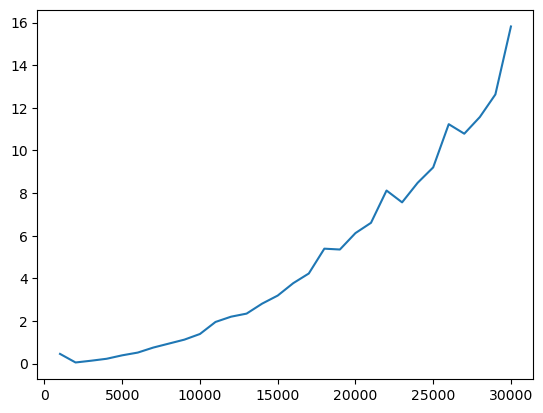

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Input size':n,
    'Times':timess
}

df = pd.DataFrame(data)
print(df)

plt.plot(n,timess)

#### This graph supports my time complexity analysis of theta(n^2). In the worst case, the make_complete_graph function runs at O(n^2). In the best case, it runs omega(n). In our case, this function has a exponential curve, confirming my analysis of theta(n^2)

# 2. Cycle Graph

In [262]:
graph3 = Graph(6)
graph3.make_cycle_graph()

{1: [2, 0], 2: [3, 1], 3: [4, 2], 4: [5, 3], 5: [0, 4], 6: [1, 5]}

In [288]:
file_of_integers(graph3)

6 - Number of Vertices
7 - Starting location for vertex 1 edges
9 - Starting location for vertex 2 edges
11 - Starting location for vertex 3 edges
13 - Starting location for vertex 4 edges
15 - Starting location for vertex 5 edges
17 - Starting location for vertex 6 edges
20 - Vertex 1 is adjacent to Vertex 2 and has a weight of 1
21 - Vertex 1 is adjacent to Vertex 0 and has a weight of 1
22 - Vertex 2 is adjacent to Vertex 3 and has a weight of 1
23 - Vertex 2 is adjacent to Vertex 1 and has a weight of 1
24 - Vertex 3 is adjacent to Vertex 4 and has a weight of 1
25 - Vertex 3 is adjacent to Vertex 2 and has a weight of 1
26 - Vertex 4 is adjacent to Vertex 5 and has a weight of 1
27 - Vertex 4 is adjacent to Vertex 3 and has a weight of 1
28 - Vertex 5 is adjacent to Vertex 0 and has a weight of 1
29 - Vertex 5 is adjacent to Vertex 4 and has a weight of 1
30 - Vertex 6 is adjacent to Vertex 1 and has a weight of 1
31 - Vertex 6 is adjacent to Vertex 5 and has a weight of 1

[6, 7,

#### Our function is working, as the nodes have edges to adjacent nodes only.

In [ ]:
import time
n = [y for y in range(1,30000,100)]
timess = []

for x in n:
    start = time.time()
    graph1 = Graph(x)
    graph1.make_cycle_graph()
    end = time.time()
    execution = (end-start)
    timess.append(execution)

     Input size     Times
0             1  0.005170
1           101  0.000079
2           201  0.000106
3           301  0.000165
4           401  0.000217
..          ...       ...
295       29501  0.054599
296       29601  0.004089
297       29701  0.004135
298       29801  0.003922
299       29901  0.054024

[300 rows x 2 columns]


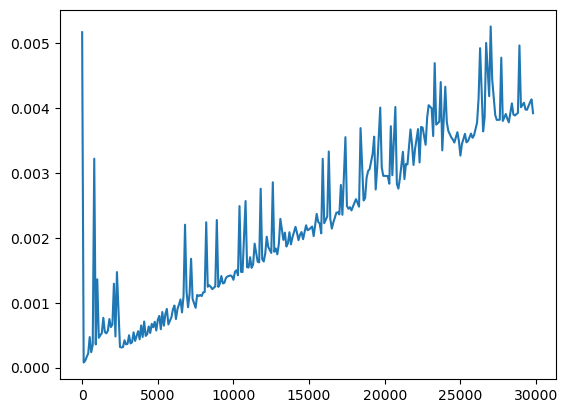

In [287]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Input size':n,
    'Times':timess
}


df = pd.DataFrame(data)
print(df)
#Removing outliers
df = df[ df['Times']<.01]

plt.plot(df['Input size'], df['Times'])
plt.show()

#### My time complexity analysis of make_cycle_graph was correct, as the data clearly show a linear relationship. I removed the outliers as it made the data easier to visualize and more realistic as to what the actually time complexity is. I expect the outliers had to do with some Python 'behind the scenes' work.

# 3. Graph of Random Pairs of Edges

In [291]:
#Creating a graph with 10 nodes and 15 edges
graph4 = Graph(10)
graph4.generate_random_edges(15)
print(graph4.nodes)
print()
print(graph4.adj_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

{1: [3, 8, 7, 4], 2: [8], 3: [1, 5, 9], 4: [6, 9, 1], 5: [8, 3], 6: [4, 9, 10], 7: [1], 8: [1, 5, 2], 9: [6, 3, 4], 10: [6]}


#### Our function of generating random edges between the V vertices we create the graph with works. None of the vertices have any duplicate edges, and each edge is displayed in the two vertices that it connects. Furthermore, these edges are randomly chosen as well.

In [292]:
file_of_integers(graph4)

10 - Number of Vertices
11 - Starting location for vertex 1 edges
15 - Starting location for vertex 2 edges
16 - Starting location for vertex 3 edges
19 - Starting location for vertex 4 edges
22 - Starting location for vertex 5 edges
24 - Starting location for vertex 6 edges
27 - Starting location for vertex 7 edges
28 - Starting location for vertex 8 edges
31 - Starting location for vertex 9 edges
34 - Starting location for vertex 10 edges
36 - Vertex 1 is adjacent to Vertex 3 and has a weight of 1
37 - Vertex 1 is adjacent to Vertex 8 and has a weight of 1
38 - Vertex 1 is adjacent to Vertex 7 and has a weight of 1
39 - Vertex 1 is adjacent to Vertex 4 and has a weight of 1
40 - Vertex 2 is adjacent to Vertex 8 and has a weight of 1
41 - Vertex 3 is adjacent to Vertex 1 and has a weight of 1
42 - Vertex 3 is adjacent to Vertex 5 and has a weight of 1
43 - Vertex 3 is adjacent to Vertex 9 and has a weight of 1
44 - Vertex 4 is adjacent to Vertex 6 and has a weight of 1
45 - Vertex 4 i

In [343]:
#Randomly generating V/2 edges for graphs with node sizes 100 through 10000
import time
n = [y for y in range(1,100)]
timess = []

for x in n:
    start = time.time()
    graph4 = Graph(x)
    graph4.generate_random_edges(x)
    end = time.time()
    execution = (end-start)
    timess.append(execution)

    Input size     Times
0            1  0.021356
1            2  0.000025
2            3  0.000004
3            4  0.000005
4            5  0.000005
..         ...       ...
94          95  0.000099
95          96  0.000089
96          97  0.000094
97          98  0.000112
98          99  0.000103

[99 rows x 2 columns]


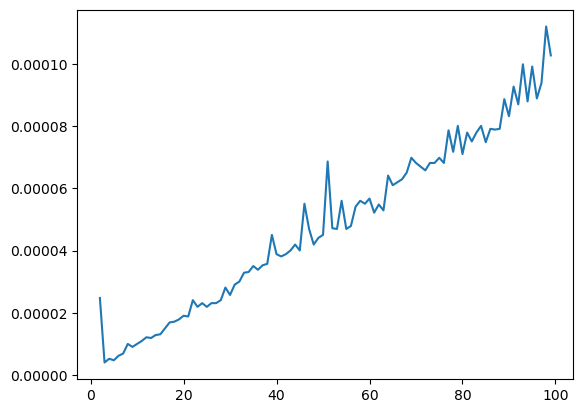

In [344]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Input size':n,
    'Times':timess
}


df = pd.DataFrame(data)
print(df)
#Removing outliers
df = df[ df['Times']<.0004]

plt.plot(df['Input size'], df['Times'])
plt.show()

#### This ran as I expected, as the two functions called run in constant and O(n) time. Therefore, I expected this to run in theta(n) time, which is displayed by its linear relationship in the graph.

In [340]:
#If all possible edges are created, the amount of edges would be n(n-1)/ 2
#In essence, we are creating complete graphs
import time
n = [y for y in range(1,1000,100)]
timess = []

for x in n:
    start = time.time()
    graph4 = Graph(x)
    graph4.generate_random_edges((x*(x-1))//2)
    end = time.time()
    execution = (end-start)
    timess.append(execution)

   Input size     Times
0           1  0.000011
1         101  0.014433
2         201  0.035322
3         301  0.069513
4         401  0.129494
5         501  0.235006
6         601  0.400299
7         701  0.618543
8         801  0.909401
9         901  1.326831


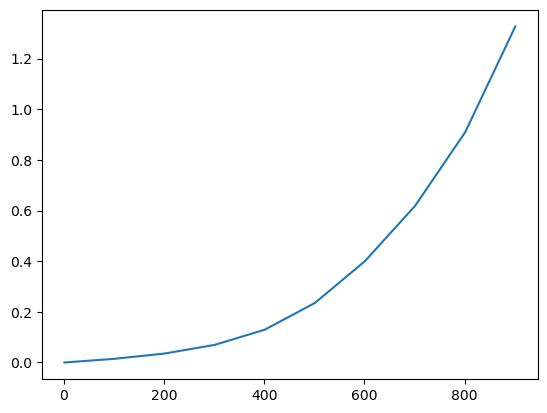

In [342]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Input size':n,
    'Times':timess
}

df = pd.DataFrame(data)
print(df)

plt.plot(df['Input size'], df['Times'])
plt.show()

#### This graph confirms my hypothesis of a theta(n^2) time complexity, as using the maximum amount of edges essentially means creating complete graphs, which as we proved above, has a time complexity of theta(n^2)

In [347]:
#If all possible edges are created, the amount of edges would be n(n-1)/ 2
#In essence, we are creating complete graphs
import time
n = [y for y in range(1,1000)]
timess = []

for x in n:
    start = time.time()
    graph4 = Graph(x)
    graph4.generate_random_edges(0)
    end = time.time()
    execution = (end-start)
    timess.append(execution)

     Input size         Times
0             1  2.460480e-04
1             2  2.145767e-06
2             3  7.152557e-07
3             4  2.145767e-06
4             5  2.145767e-06
..          ...           ...
994         995  5.984306e-05
995         996  6.008148e-05
996         997  5.793571e-05
997         998  8.511543e-05
998         999  5.817413e-05

[999 rows x 2 columns]


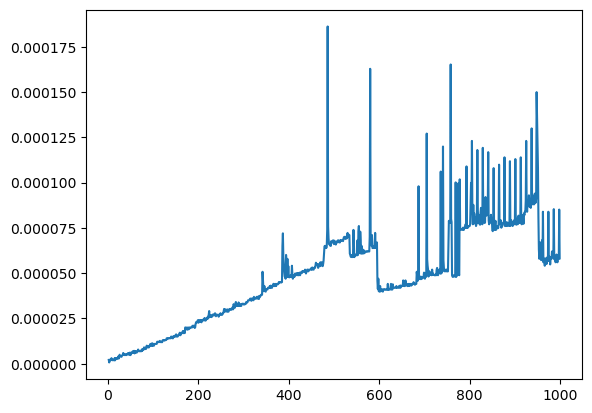

In [351]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Input size':n,
    'Times':timess
}

df = pd.DataFrame(data)
print(df)

df = df[ df['Times']<.0002]

plt.plot(df['Input size'], df['Times'])
plt.show()

#### Creating graphs with no edges leads to a time complexity of linear time, as we are simply creating graphs which leads to a theta(n) time as predicted above. This is because upon creating the object, we iterate the the nodes to create adjacency lists.